# Second test - Chanh Nguyen 1504202
Introduction to Numerical Problem Solving, Spring 2017   
10.5.2017    
Helsinki Metropolia University of Applied Sciences

In [256]:
# Import necessary libraries
%pylab inline
from scipy.optimize import root, minimize, curve_fit
from scipy.stats import linregress

Populating the interactive namespace from numpy and matplotlib


## Problem 1
In the ocean engineering, the equation for a refected standing wave in a harbour is given by:    
${\large h(x,t,h_0,\lambda, v) = h_0[sin(\frac{2\pi x}{\lambda})cos(\frac{2\pi tv}{\lambda})+e^{-x}]}$

### (a) Draw the reflected standing wave for positive values of x from 0 to 30, when $\lambda$ = 16, t = 12, v = 48, and $h_0$ = 0.35

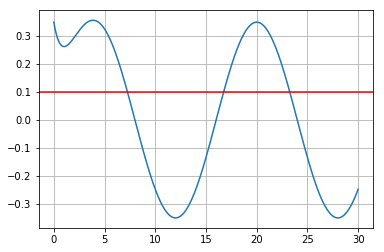

In [257]:
# Initial parameters
lamda = 16
t = 12
v = 48
h0 = 0.35

# Define function
def h(x):
    return h0*(sin(2*pi*x/lamda)*cos(2*pi*t*v/lamda) + e**(-x))

# x from 0 to 30
x = linspace(0, 30, 1000)

# Graph function
plot(x, h(x))
axhline(0.1, color = 'r')
grid()

### (b) Use any numerical method to solve for the lowest posotive value of x, which satisfies the equation, when h(x) = 0.1 . Give the answer within 6 significant figures accuracy.

In [258]:
# Define function h2(x) = h(x) - 0.1
def h2(x):
    return h(x) - 0.1

# Find root for h2(x) = 0 <=> h(x) = 0.1 
# By observe the graph, I guess x0 = 5, and tol = 1e-6
r = root(h2, 5, tol = 1e-6)
x0 = r.x[0]
x0

7.2640139958084049

In [259]:
# Check the answer by pass the solution to function h(x)
h(x0)

0.1000000000000003

### (c) What is the smallest value of h(x) within the range $x \in [0, 30]$? Where does it locate? Give the answer within 6 significant figues accuracy
###### In the graph, we saw there are 2 possible minimize points at $x \in [10, 15]$ and $x \in [25, 30]$, we will guess x0 = 10 and 25

In [260]:
# Use minimize function with x0 = 10
min10 = minimize(h, 10, tol = 1e-6)
min10

      fun: -0.3499978495685147
 hess_inv: array([[ 18.52708953]])
      jac: array([ -3.72529030e-09])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([ 12.00003984])

In [261]:
# Use minimize function with x0 = 25
min25 = minimize(h, 25, tol = 1e-6)
min25

      fun: -0.3499999999985784
 hess_inv: array([[ 18.55449663]])
      jac: array([  3.57627869e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([ 28.00000661])

In [262]:
# Check which x give the smaller fucntion h(x)
min25.fun < min10.fun

True

###### We see that x2 = 28.00000661 gives smaller h(x2) = -0.349999999999 in compare with x1 = 12.00003984 with h(x1) = -0.349997849569
###### So x = 28.00000661 and h = -0.3499999999985784 is the point we need to find

### Final answers problem 1:

* (a) The graph is as above
* (b) h(x) = 0.1 => x = 7.2640139958084049
* (c) The smallest value of h = -0.3499999999985784 when x = 28.00000661 with tol = 1e-6

## Problem 2
Consider the following function: $f(x) = -x^4 - 2x^3 - 8x^2 - 5x$

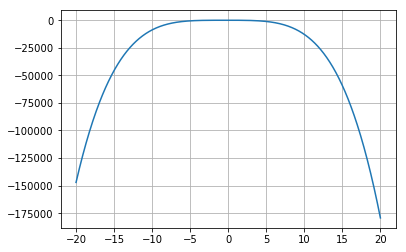

In [263]:
# Define function f(x)
def f(x):
    return -x**4 - 2*x**3 - 8*x**2 - 5*x

# x is from -20 to 20
x = linspace(-20, 20, 1000)
plot(x, f(x))
grid()

### (a) Golden-section

In [264]:
def goldenRatioSearch(f, a, b, tol=1e-8, maxiter=100):
    
    # Initilialize the requirements
    r = (sqrt(5)-1)/2
    xopt = (b+a)/2
    fx = f(xopt)
    n = 0
    
    while n < maxiter:
        n += 1
        d = r*(b-a)
        x1 = a+d
        x2 = b-d
        f1 = f(x1)
        f2 = f(x2)
        
        # Shorten the bound
        if f1>f2:
            a = x2
            x2 = x1
            x1 = a+d
            f2 = f1
            f1 = f(x1)
            xopt = x1
            fx = f(xopt)
        else:
            b = x1
            x1 = x2
            x2 = b-d
            f1 = f2
            f2 = f(x2)
            xopt = x1
            fx = f(xopt)
            
        # Check result    
        if xopt != 0:
            ea = (1-r)*abs((b-a)/xopt)
        if ea < tol:
            break
            
    return xopt, fx, ea, n

In [265]:
# The initial guesses of xlow = -5.0 and xhigh = 5.0. Perform maxiter 100 iterations
gR = goldenRatioSearch(f, -5, 5, tol=1e-10)
gR

(-0.34725046604174103, 0.84079393527862889, 9.2264987613601806e-11, 53)

### (b) Newton-Raphson's method

In [266]:
def newtonRaphsonSearch(f, x0, tol=1e-8, maxiter=100):
    
    # Initial requirements
    n = 0
    h = tol
    hh = h**2
    while n<maxiter:
        n+=1
        
        # Calculate first and second order of the differentiation
        fp = (f(x0+h)-f(x0))/h
        fpp = (f(x0+h)-2*f(x0)+f(x0-h))/hh
        if fpp != 0:
            x1 = x0 - fp/fpp
        else:
            x1 = x0 + tol
            
        # Check result    
        if x1 != 0:
            ea = abs((x1-x0)/x1)
        else:
            ea = abs(x1-x0)
        if ea<tol:
            break
        x0 = x1
        
    return x1, f(x1), ea, n 

In [267]:
# The initial guess of x0 = 0.0.
newtonRaphsonSearch(f, 0, tol=100e-10)

(-0.34725047124920183, 0.8407939352786287, 2.215204452881188e-09, 9)

### Final answers problem 2:
Find the maximum
* (a) Golden-section: f_max = 0.84079393527862889 ; x = -0.34725046604174103 ; iteration = 53
* (b) Newton-Raphson's method: f_max = 0.8407939352786287 ; x = -0.34725047124920183 ; iterations = 9

## Problem 3
Use least-squared regression to fit a straight line $y = ax + b$ to

<table style="width:100%">
    <tr>
        <th>x</th>
        <td>0</td>
        <td>2</td>
        <td>4</td>
        <td>6</td>
        <td>9</td>
        <td>11</td>
        <td>12</td>
        <td>15</td>
        <td>17</td>
        <td>19</td>
    </tr>
    <tr>
        <th>y</th>
        <td>5</td>
        <td>6</td>
        <td>7</td>
        <td>6</td>
        <td>9</td>
        <td>8</td>
        <td>7</td>
        <td>10</td>
        <td>12</td>
        <td>12</td>
    </tr>
</table>

'The model equation: y = a*x + b with a = 0.352469959947 and b = 4.85153538051'

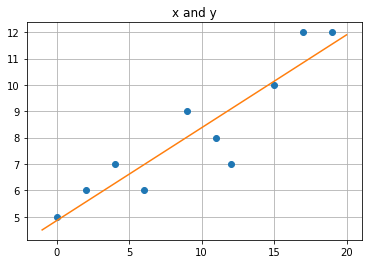

In [268]:
# Create array x and y
x = array([0, 2, 4, 6, 9, 11, 12, 15, 17, 19])
y = array([5, 6, 7, 6, 9, 8, 7, 10, 12, 12])

# The data has a linear relationship between x and y. Use linregress for x and y
r = linregress(x, y)
a = r.slope
b = r.intercept

# Create equation based on linregress result
x2 = linspace(-1, 20, 1000)
y2 = a*x2 + b

# Plot graph x and y
plot(x, y, 'o')
plot(x2, y2)
title('x and y')
grid()

'The model equation: y = a*x + b with a = '+str(r.slope)+' and b = '+str(r.intercept)

In [269]:
# The standard error of the estimated gradient and the correlation coefficient
r.stderr

0.055033565698469768

In [270]:
r.rvalue**2

0.83679918548472276

In [271]:
# Use the resulting linear equation to predict y at x = 8.0
y_predict =  a*8 + b
y_predict

7.671295060080106

### Final answers problem 3:

* The model y = a*x + b with a = 0.352469959947 and b = 4.85153538051
* Standard error: 0.055033565698469768
* Coefficient of determination R^2 = 0.83679918548472276
* The model is acceptable, but not very good, we can clearly see in the graph and with R^2 = 0.8368
* x = 8.0 => y_predict = 7.671295060080106

## Problem 4
The following table shows the power $P$ supplied to the driving wheels of a car as a function of the spped $v$. If the mass of the car is $m = 2000 kg$, determine the time $\Delta t$ it takes for the car accelerate from 1.0 m/s to 6.0 m/s. Use the trapezoidal rule for integration

<table style="width:100%">
    <tr>
        <th>v(m/s)</th>
        <td>0.0</td>
        <td>1.0</td>
        <td>1.8</td>
        <td>2.4</td>
        <td>3.5</td>
        <td>4.4</td>
        <td>5.1</td>
        <td>6.0</td>
    </tr>
    <tr>
        <th>P(kW)</th>
        <td>0.0</td>
        <td>4.7</td>
        <td>12.2</td>
        <td>19.0</td>
        <td>31.8</td>
        <td>40.1</td>
        <td>43.8</td>
        <td>42.3</td>
    </tr>
</table>

The model equation is:
P = a*x**3 + b*x**2 + c*2 + d
with a = -524.577217044 , b = 4166.9280845 , c = 938.260441674 , d = 40.4850764217


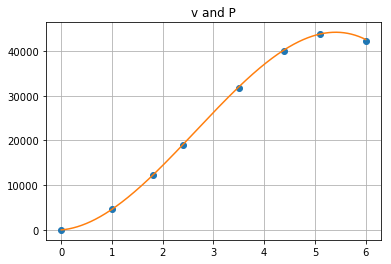

In [272]:
# Create arrays v and P, the unit of P is kW, so we have to convert to Watt
v = array([0, 1, 1.8, 2.4, 3.5, 4.4, 5.1, 6])
P = array([0, 4.7, 12.2, 19, 31.8, 40.1, 43.8, 42.3])*1000

# The data has a curve relationship between x and y. Use curve_fit for v and P with type P = a*x**3 + b*x**2 + c*2 + d

def curveFunc(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

cf = curve_fit(curveFunc, v, P)[0]

# Create equation based on linregress result
v2 = linspace(0, 6, 1000)
P2 = cf[0]*v2**3 + cf[1]*v2**2 + cf[2]*v2 + cf[3]*v2

# Plot graph x and y
plot(v, P, 'o')
plot(v2, P2)
title('v and P')
grid()

print('The model equation is:')
print('P = a*x**3 + b*x**2 + c*2 + d\nwith a = '+str(cf[0])+' , b = '+str(cf[1])+' , c = '+str(cf[2])+' , d = '+str(cf[3]))

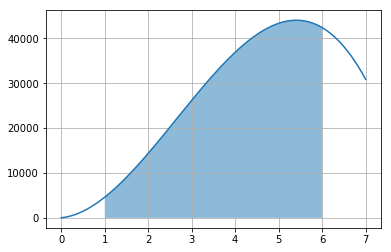

In [273]:
# Function P by v
def p(v):
    return cf[0]*v**3 + cf[1]*v**2 + cf[2]*v + cf[3]

# Graphical presentation
v0 = 1
v1 = 6

vi = linspace(v0, v1, 1000)

# Calculate the function values
Pi = p(vi)

# Fill the integration area
fill_between(vi, Pi, alpha = 0.5)

# Make another graph showing the function
vi2 = linspace(v0-1, v1+1, 1000)
Pi2 = p(vi2)
plot(vi2, Pi2)
grid()

In [274]:
# Use the multiple-application Trapezoidal rule to calculate the integration v/P
It = trapz(vi/Pi, vi)
It

0.00064148495209118042

In [275]:
m = 2000

# Compute the delta_t by formular
delta_t = m*It
delta_t

1.2829699041823608

### Final answers problem 4:

* $\Delta t$ = 1.2829699041823608 second